# Pandas optimize memory notebook

---

Loading data from Kaggle

In [1]:
import pandas as pd

df = pd.read_csv("train_split_00.csv")

In [2]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
1019920,2013-10-30 18:55:20.0000001,5.5,2013-10-30 18:55:20 UTC,-73.988070,40.753954,-73.994386,40.744540,1
1019921,2013-11-03 21:18:53.0000001,19.0,2013-11-03 21:18:53 UTC,-73.975444,40.748933,-73.950062,40.718251,1
1019922,2009-07-10 14:50:00.000000155,4.5,2009-07-10 14:50:00 UTC,-73.993817,40.757103,-73.996427,40.750255,5
1019923,2012-01-09 08:59:15.0000005,9.7,2012-01-09 08:59:15 UTC,-73.981400,40.764200,-74.008400,40.745500,0


In [3]:
df.dtypes # Check the datatypes of columns

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

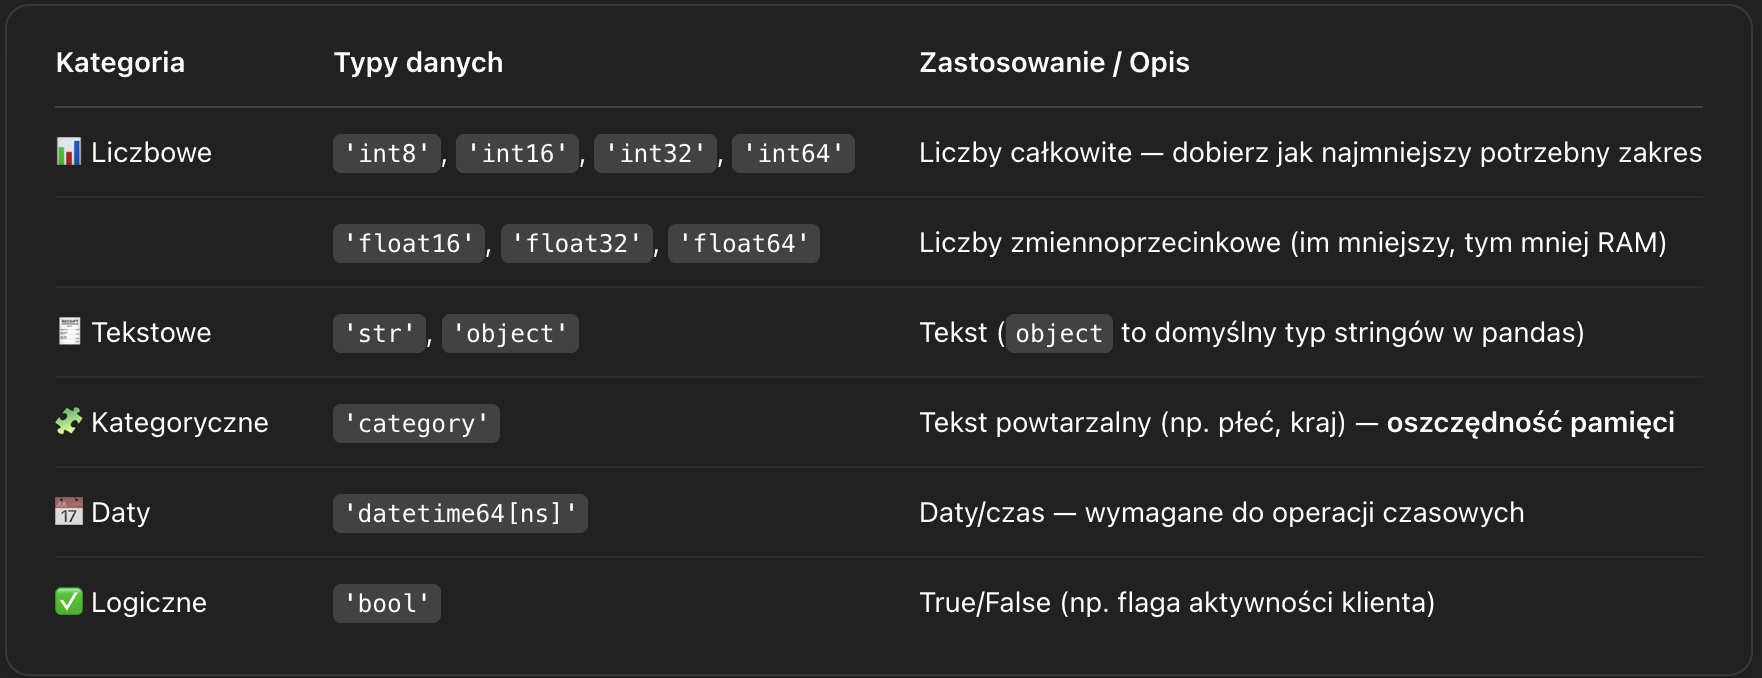

Popularniejsze typy danych znajdują się powyzej.

Z wazniejszych informacji:
- dane numeryczne (int):
    -   Int8, ma zakres od -127 do 128. W pamieci to 1 bajt
    -   Int16, ma zakres od -32_768 do 32_767. W pamieci to 2 bajty
    -   itd.
    -   float16, ma 16 bitów -> 2 bajty, przechowuje okolo 3-4 liczby po przecinku
    -   float32, ma 32 bity -> 4 bajty, przechowuje 6-7 cyfr po przecinku
    -   float64, ma 64 bity -> 8 bajtow,przechowuje 15-16 cyfr
    -   uint8, ma zakres dodatni, nie uwzglednia ujemnych, zakres od 0 do 255
    -   uint16, ma zakres dodatni, nie uwzglednia ujemnych, zakres od 0 do 65535
- dane tekstowe (string, object):
    -   object, reprezentuje ciagi znakow, ale moze zawierac takze inne typy danych, jak daty, listy, liczby
    -   string, reprezentuje ciagi znakow (tylko), bardziej wydajny od object, pozwala na wydajniejsze operacje tekstowe
- dane dnia (datetime):
    -   Reprezentuje dane daty i czasu, umozliwia filtrowanie dat, obliczenia czasu, grupowanie po miesiacach
- kategorie ('category'):
    -   typ danych idealny dla kolumn w ktorych powtarzaja sie dane, takie jak miasto, plec, status.
    -   Np. Zamiast zapisywac Warszawa 1000 razy, zapisuje ja tylko raz i reszta zapisow to jedynie wskazniki, co ogranicza uzycie pamieci.
    -   Bardzo oszczedny w pamieci i wydajny typ danych. Uzyteczny do grupowania
- Bool:
    -   Wartosci True/False, zajmuje bardzo malo pamieci

Funkcja **df.astype("typ_danych")** - funkcja, ktora zmienia typ danych danej tabeli, na okreslony przez nas.

Do danych dotyczacych dat, lepiej uzywac pd.to_datetime(), jest bezpieczniejszy.

In [4]:
df['fare_amount'].agg(func=['min', 'max'], axis=0) # range from -44.9 to 500, but its float anyways. There is only 1 digit after comma, so we can use float16 to optimize memory


min    -44.9
max    500.0
Name: fare_amount, dtype: float64

In [5]:
df['pickup_longitude'].agg(func=['min', 'max'], axis=0) # range from -3377 to 2522, but its float

min   -3377.680935
max    2522.271325
Name: pickup_longitude, dtype: float64

In [6]:
df['passenger_count'].agg(func=['min', 'max'], axis=0) # -> range from 0 to 208, so its good to use uintx

min      0
max    208
Name: passenger_count, dtype: int64

In [7]:
# astype + to_datetime convertion of dtypes
df['key'] = pd.to_datetime(df['key'])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['fare_amount'] = df['fare_amount'].astype('float16')
df['pickup_longitude'] = df['pickup_longitude'].astype('float32')
df['pickup_latitude'] = df['pickup_latitude'].astype('float32')
df['dropoff_longitude'] = df['dropoff_longitude'].astype('float32')
df['dropoff_latitude'] = df['dropoff_latitude'].astype('float32')
df['passenger_count'] = df['passenger_count'].astype('uint8')


In [8]:
df.dtypes

key                       datetime64[ns]
fare_amount                      float16
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float32
pickup_latitude                  float32
dropoff_longitude                float32
dropoff_latitude                 float32
passenger_count                    uint8
dtype: object

downcasting, to opcja zmiejszenia wartosci floata, poprzez funkcje** pd.to_numeric(df['col'], downcast='type')**.

Wazne, ze pandas nie zmniejsza typu danych, w przypadku gdy wykryje, ze moze to zmniejszyc precyzje

In [9]:
df['fare_amount'] = df['fare_amount'].astype('float64') # Zmiana na float64, dla testu
df.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float32
pickup_latitude                  float32
dropoff_longitude                float32
dropoff_latitude                 float32
passenger_count                    uint8
dtype: object

In [10]:
df['fare_amount'] = pd.to_numeric(df['fare_amount'], downcast='float') # Downcast do float32
df.dtypes  

key                       datetime64[ns]
fare_amount                      float32
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float32
pickup_latitude                  float32
dropoff_longitude                float32
dropoff_latitude                 float32
passenger_count                    uint8
dtype: object

In [11]:
df['passenger_count'] = df['passenger_count'].astype('int64') # Przejscie z int64
df.dtypes

key                       datetime64[ns]
fare_amount                      float32
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float32
pickup_latitude                  float32
dropoff_longitude                float32
dropoff_latitude                 float32
passenger_count                    int64
dtype: object

In [12]:
df['passenger_count'] = pd.to_numeric(df['passenger_count'], downcast='unsigned') # na uint8 z downcast
df.dtypes

key                       datetime64[ns]
fare_amount                      float32
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float32
pickup_latitude                  float32
dropoff_longitude                float32
dropoff_latitude                 float32
passenger_count                    uint8
dtype: object

Przetwarzanie duzych plikow, za pomoca chunk_size. parametr chunk_size, dziala w taki sposob, ze rozdziela dane na paczki danych ('chunki'), ktore sa wczytywane po kolei, zamiast wszyskich danych za jednym razem, co pomaga zwiekszyc efektywnosc, szybkosc wczytywania, a takze umozliwia robienie operacji na wczytywanych chunkach.

In [13]:
import time

start = time.time()
df = pd.read_csv('train_split_00.csv') # normalne wczytanie danych
end = time.time()
print(f"Time without chunksize: {end - start:.2f} s.")

Time without chunksize: 0.83 s.


In [14]:
import time

start = time.time()
df_chunked = pd.read_csv('train_split_00.csv', chunksize=10_000) # wczytywanie z chunksize

end = time.time()
print(f"Time with chunksize: {end - start:.2f} s.")

Time with chunksize: 0.00 s.


In [15]:
start = time.time()
df_chunked = pd.read_csv('train_split_00.csv', chunksize=10_000) # wczytywanie z chunksize

for x, chunk in enumerate(df_chunked):
    print(f"{x}: shape: {chunk.shape} and size: {chunk.size}")

end = time.time()
print(f"Time with chunksize: {end - start:.2f} s.")



0: shape: (10000, 8) and size: 80000
1: shape: (10000, 8) and size: 80000
2: shape: (10000, 8) and size: 80000
3: shape: (10000, 8) and size: 80000
4: shape: (10000, 8) and size: 80000
5: shape: (10000, 8) and size: 80000
6: shape: (10000, 8) and size: 80000
7: shape: (10000, 8) and size: 80000
8: shape: (10000, 8) and size: 80000
9: shape: (10000, 8) and size: 80000
10: shape: (10000, 8) and size: 80000
11: shape: (10000, 8) and size: 80000
12: shape: (10000, 8) and size: 80000
13: shape: (10000, 8) and size: 80000
14: shape: (10000, 8) and size: 80000
15: shape: (10000, 8) and size: 80000
16: shape: (10000, 8) and size: 80000
17: shape: (10000, 8) and size: 80000
18: shape: (10000, 8) and size: 80000
19: shape: (10000, 8) and size: 80000
20: shape: (10000, 8) and size: 80000
21: shape: (10000, 8) and size: 80000
22: shape: (10000, 8) and size: 80000
23: shape: (10000, 8) and size: 80000
24: shape: (10000, 8) and size: 80000
25: shape: (10000, 8) and size: 80000
26: shape: (10000, 8) 

wektoryzacja i operacje zbiorcze.

Polega to na uzywaniu wektoryzacji, czyli szybszego zapisu, dotyczacego wykonywania operacji na kolumnach, poprzez zapis df['kol'] = operacja, zamiast uzywania skladni for x in df.iterrows():

In [16]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [17]:
import time
distances = []

start = time.time()
for index, row in df.iterrows():
    # longitude i latitude to wspolrzedne geograficzne miejsca odbioru i wysiadki 
    distance = abs(row['dropoff_longitude'] - row['pickup_longitude']) + abs(row['dropoff_latitude'] - row['pickup_latitude'])
    distances.append(distance)

df['distance'] = distances
end = time.time()

print(f"time for this operation with df.iterrows(): {end - start:.2f}")

time for this operation with df.iterrows(): 13.17


In [18]:
import time

start = time.time()
df['distance_2'] = (
    abs(df['dropoff_longitude'] - df['pickup_longitude']) + abs(df['dropoff_latitude'] - df['pickup_latitude'])
)
end = time.time()
print(f"time for this operation with vectorize: {end - start:2f}")


time for this operation with vectorize: 0.006965


In [19]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_2
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,0.011742
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,0.107481
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,0.019212
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,0.029386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,0.027194
...,...,...,...,...,...,...,...,...,...,...
1019920,2013-10-30 18:55:20.0000001,5.5,2013-10-30 18:55:20 UTC,-73.988070,40.753954,-73.994386,40.744540,1,0.015730,0.015730
1019921,2013-11-03 21:18:53.0000001,19.0,2013-11-03 21:18:53 UTC,-73.975444,40.748933,-73.950062,40.718251,1,0.056064,0.056064
1019922,2009-07-10 14:50:00.000000155,4.5,2009-07-10 14:50:00 UTC,-73.993817,40.757103,-73.996427,40.750255,5,0.009458,0.009458
1019923,2012-01-09 08:59:15.0000005,9.7,2012-01-09 08:59:15 UTC,-73.981400,40.764200,-74.008400,40.745500,0,0.045700,0.045700


Pomiar pamieci 

Mozemy sprawdzic pobor pamieci ram przez nasze dane, przy uzyciu **df.memory_usage(deep=True)**, deep=True; oznacza dokladnosc sprawdzenia, liczby podane w memory_usage sa podane w bajtach

In [20]:
df.memory_usage(deep=True) # Dokladne informacje, ile dana kolumna pobiera pamieci

Index                     132
key                  78204651
fare_amount           8159400
pickup_datetime      73434600
pickup_longitude      8159400
pickup_latitude       8159400
dropoff_longitude     8159400
dropoff_latitude      8159400
passenger_count       8159400
distance              8159400
distance_2            8159400
dtype: int64

In [21]:
df.info(memory_usage='deep') # Szybsze i bardziej ogolne dane, pokazuje sumaryczna wartosc zajmowanej pamieci + daje ogolny przeglad

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019925 entries, 0 to 1019924
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1019925 non-null  object 
 1   fare_amount        1019925 non-null  float64
 2   pickup_datetime    1019925 non-null  object 
 3   pickup_longitude   1019925 non-null  float64
 4   pickup_latitude    1019925 non-null  float64
 5   dropoff_longitude  1019915 non-null  float64
 6   dropoff_latitude   1019915 non-null  float64
 7   passenger_count    1019925 non-null  int64  
 8   distance           1019915 non-null  float64
 9   distance_2         1019915 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 206.9 MB


Uzywanie copy

Gdy edytuje dane w dataframie (filtrowanym np.) to pandas nie do konca wie czy operuje na dataframe oryginalnym czy kopii, dlatego warto uzywac .copy(), aby jasno sygnalizowac Pandas, ze chce uzywac kopii.

In [25]:
df['key'] = pd.to_datetime(df['key'])

In [26]:
df_filtered = df[(df['key'].dt.year >= 2009) & (df['key'].dt.year <= 2011)].copy()

In [29]:
df_filtered_2 = df[(df['key'].dt.year >= 2009) & (df['key'].dt.year <= 2011)]

In [31]:
df_filtered

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_2
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,0.011742
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,0.107481
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,0.019212
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,0.027194
5,2011-01-06 09:50:45.000000200,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,0.054675,0.054675
...,...,...,...,...,...,...,...,...,...,...
1019911,2010-09-11 23:44:00.000000760,6.1,2010-09-11 23:44:00 UTC,-73.960443,40.769717,-73.966010,40.772902,1,0.008752,0.008752
1019915,2009-03-12 20:39:00.000000680,6.1,2009-03-12 20:39:00 UTC,-73.950060,40.776328,-73.969862,40.785555,5,0.029029,0.029029
1019917,2009-04-02 18:57:00.000000271,12.9,2009-04-02 18:57:00 UTC,-74.003798,40.748282,-73.959208,40.770515,2,0.066823,0.066823
1019918,2011-08-05 12:10:43.000000200,7.7,2011-08-05 12:10:43 UTC,-73.963772,40.757394,-73.972709,40.745959,1,0.020372,0.020372


In [30]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_2
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,0.011742
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,0.107481
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,0.019212
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,0.029386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,0.027194
...,...,...,...,...,...,...,...,...,...,...
1019920,2013-10-30 18:55:20.000000100,5.5,2013-10-30 18:55:20 UTC,-73.988070,40.753954,-73.994386,40.744540,1,0.015730,0.015730
1019921,2013-11-03 21:18:53.000000100,19.0,2013-11-03 21:18:53 UTC,-73.975444,40.748933,-73.950062,40.718251,1,0.056064,0.056064
1019922,2009-07-10 14:50:00.000000155,4.5,2009-07-10 14:50:00 UTC,-73.993817,40.757103,-73.996427,40.750255,5,0.009458,0.009458
1019923,2012-01-09 08:59:15.000000500,9.7,2012-01-09 08:59:15 UTC,-73.981400,40.764200,-74.008400,40.745500,0,0.045700,0.045700


Dodatkowe techniki

In [33]:
df.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime              object
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
distance                    float64
distance_2                  float64
dtype: object

In [40]:

float_64_cols = df.select_dtypes('float64').columns # Wybranie kolumn z typem danych float64 
df[float_64_cols] = df[float_64_cols].apply(pd.to_numeric, downcast='float') # Nadpisanie tych kolumn za pomoca apply, aby
# zastosowac funkcje pandas.to_numeric do zrobienia downcastu tych kolumn

In [46]:
# To samo co wyzej
int_64_cols = df.select_dtypes('int64').columns
df[int_64_cols] = df[int_64_cols].apply(pd.to_numeric, downcast='integer')

In [47]:
df.dtypes

key                  datetime64[ns]
fare_amount                 float32
pickup_datetime              object
pickup_longitude            float32
pickup_latitude             float32
dropoff_longitude           float32
dropoff_latitude            float32
passenger_count               int16
distance                    float32
distance_2                  float32
dtype: object